In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('DataSet/ev_cat_01-24.csv')
df2=pd.read_csv('DataSet/EV_sales_state_india.csv')
df3=pd.read_csv('DataSet/Charging Station.csv')
df4=pd.read_excel('DataSet/Ev Sales.xlsx')
df5=pd.read_csv('DataSet/Vehicle Class - All.csv')

# Total EV Sales by Year

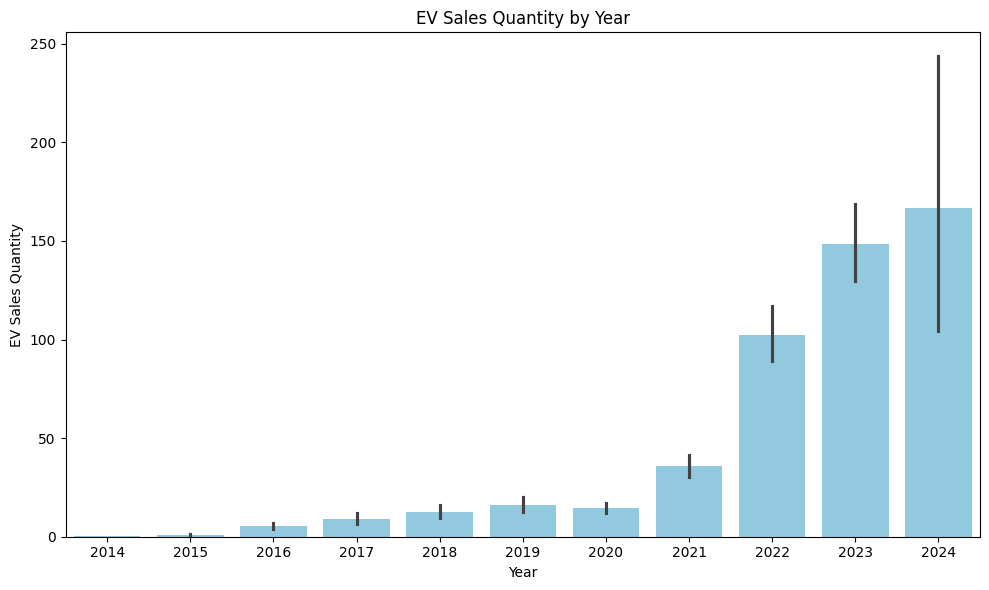

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='EV_Sales_Quantity', data=df2, color='skyblue')
plt.title("EV Sales Quantity by Year")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.show()

# EV Sales by State (Top 15 States)

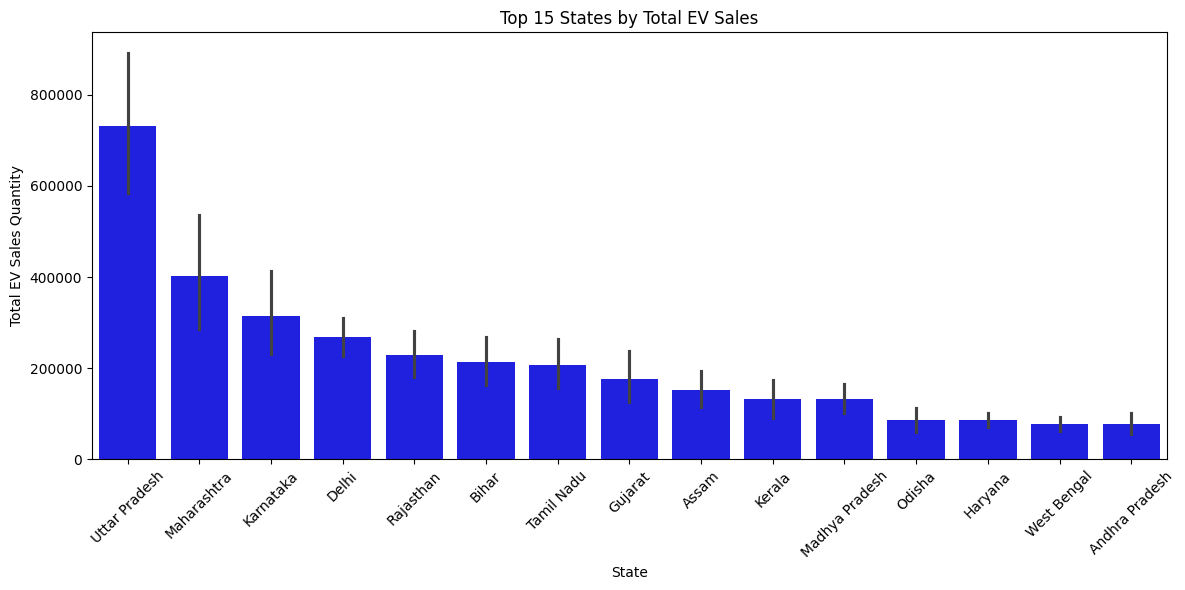

In [42]:
top_states = df2.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(15).index
df_top_states = df2[df2['State'].isin(top_states)]
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='EV_Sales_Quantity', data=df_top_states, estimator=sum, order=top_states, color='blue')
plt.title("Top 15 States by Total EV Sales")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total EV Sales Quantity")
plt.tight_layout()
plt.show()

# Total Ev sales by month

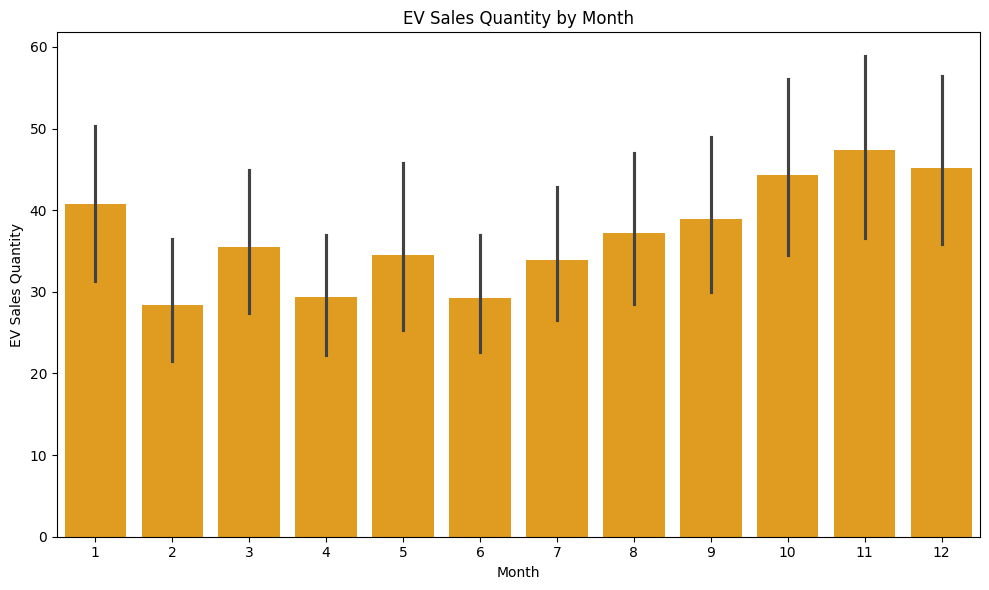

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='EV_Sales_Quantity', data=df2, color='orange')
plt.title("EV Sales Quantity by Month")
plt.xlabel("Month")
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.show()

# Distribution of EV Sales by Vehicle Class

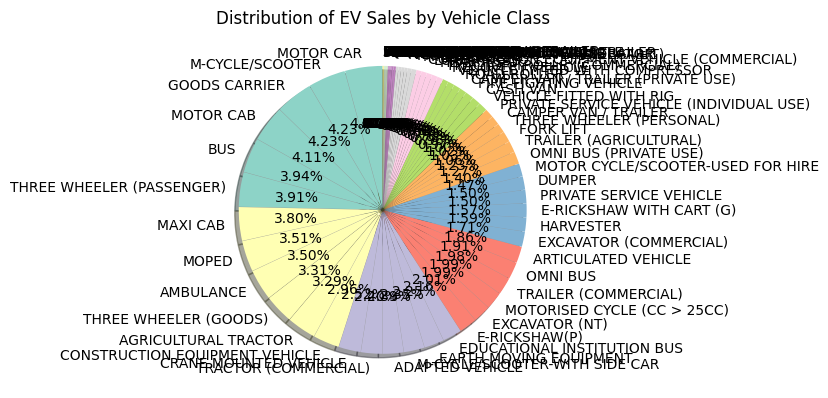

In [45]:
plt.figure(figsize=(8, 8))
df2['Vehicle_Class'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90,
    shadow=True,
    explode=[0.01]*df2['Vehicle_Class'].nunique(),  # Optional: to separate slices
    cmap='Set3'  # Optional color map
)
plt.title("Distribution of EV Sales by Vehicle Class")
plt.ylabel("")  # Hides default y-axis label
plt.tight_layout()
plt.show()

# Ev Sales vehicle Class

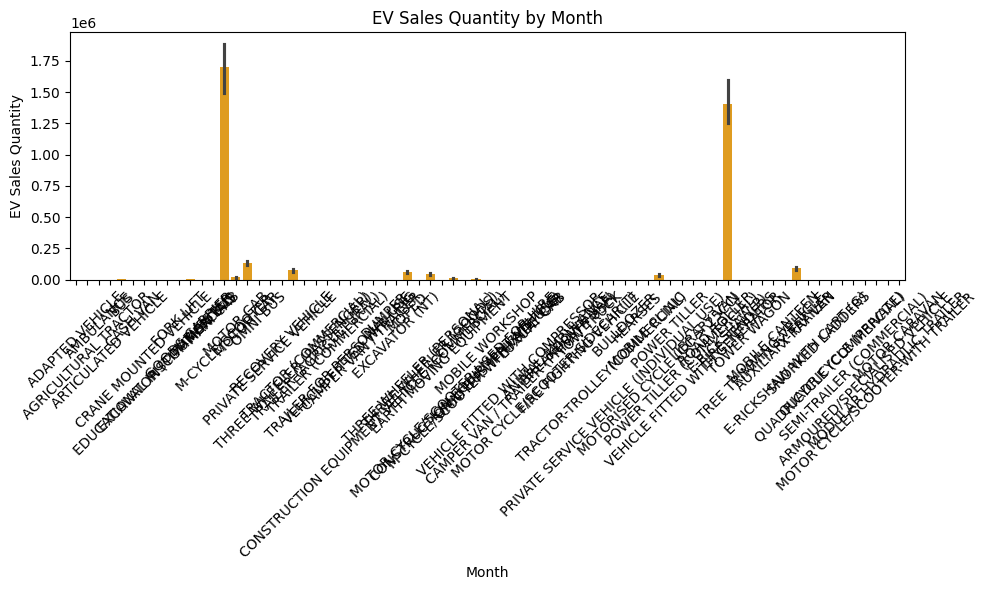

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df2, estimator=sum, color='orange')
plt.title("EV Sales by Vehicle Class")
plt.xlabel("Vehicle Clas")
plt.xticks(rotation=45)
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.show()

# Distribution of EV Sales by Vehicle_Type

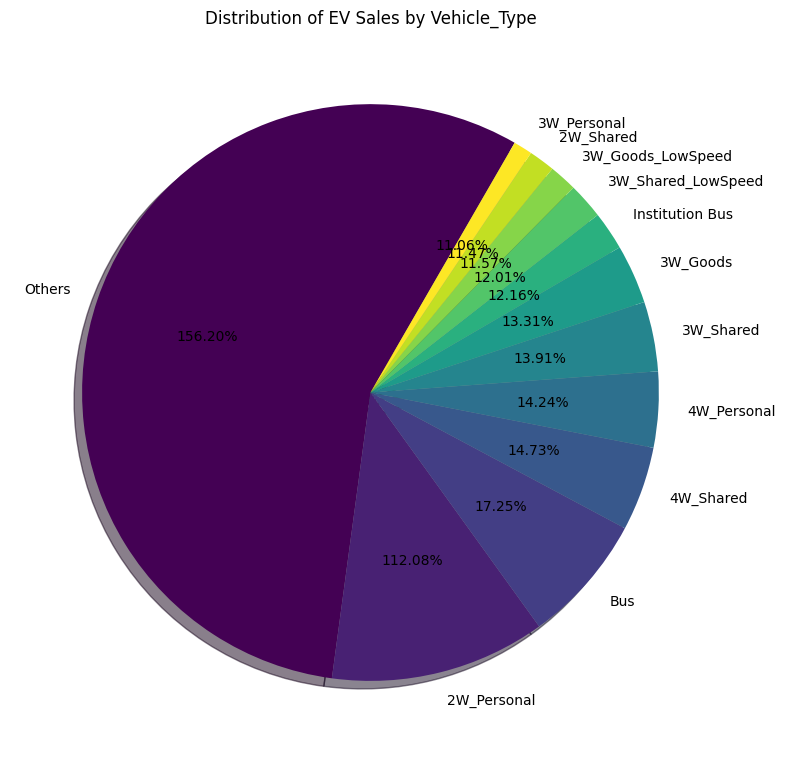

In [56]:
plt.figure(figsize=(8, 8))
df2['Vehicle_Type'].value_counts().plot(kind='pie', autopct='1%.2f%%',startangle=60,
    shadow=True, cmap='viridis')


plt.title("Distribution of EV Sales by Vehicle_Type")
plt.ylabel("")  # Hides default y-axis label
plt.tight_layout()
plt.show()


# Boxplot EV Sales Quantity

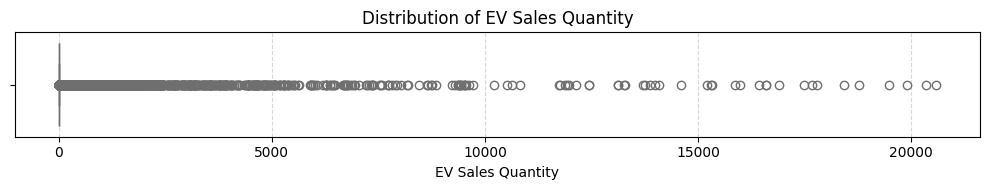

In [ ]:
plt.figure(figsize=(10, 2))  # Horizontal, slim
sns.boxplot(x='EV_Sales_Quantity', data=df2, color='skyblue')

plt.title("Distribution of EV Sales Quantity")
plt.xlabel("EV Sales Quantity")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Top Two State Ev sales

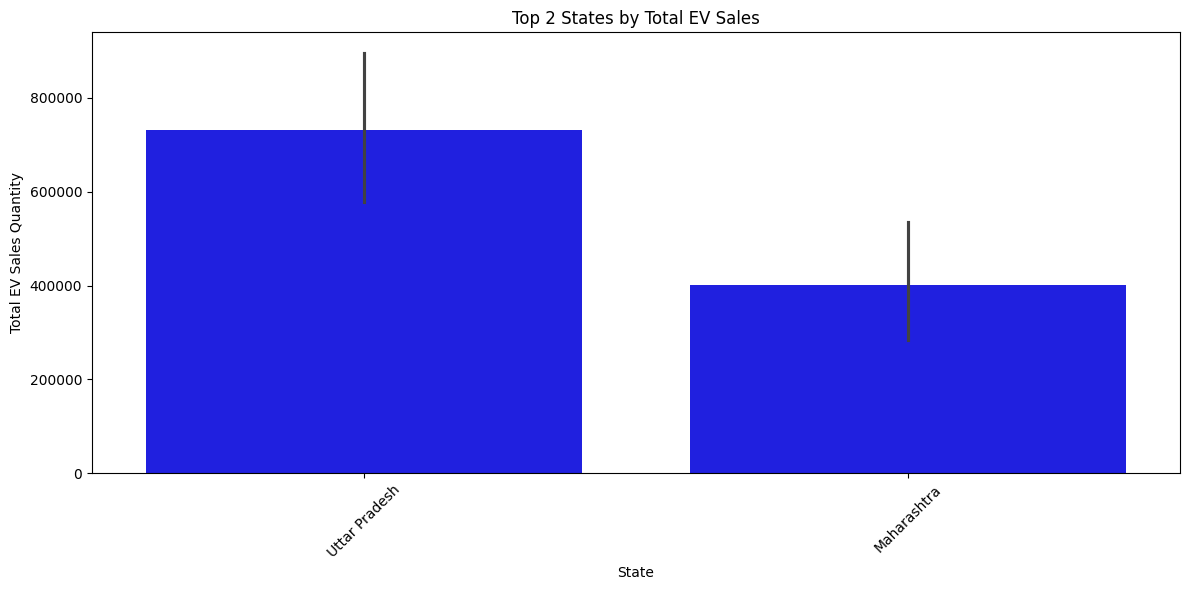

In [65]:
top_states = df2.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(2).index
df_top_states = df2[df2['State'].isin(top_states)]
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='EV_Sales_Quantity', data=df_top_states, estimator=sum, order=top_states, color='blue')
plt.title("Top 2 States by Total EV Sales")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total EV Sales Quantity")
plt.tight_layout()
plt.show()

# Top 5 Vehicale class by Total EV Sales

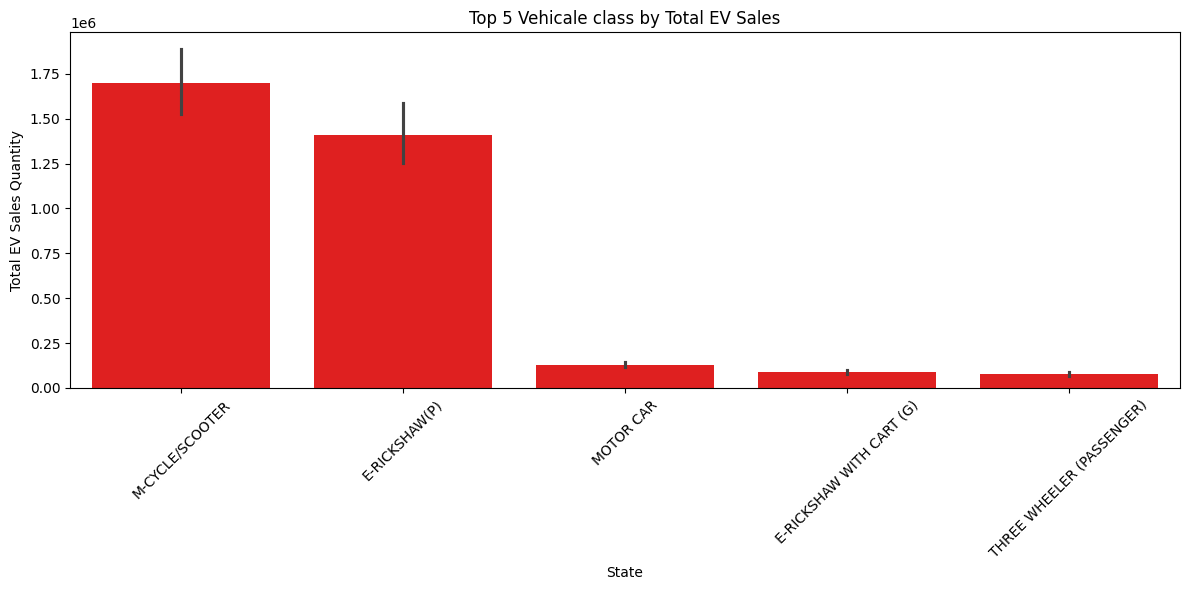

In [73]:
top=df2.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(5).index

df_top_vehicle = df2[df2['Vehicle_Class'].isin(top)]
plt.figure(figsize=(12, 6))

sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df_top_vehicle, estimator=sum, order=top, color='red')
plt.title("Top 5 Vehicale class by Total EV Sales")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total EV Sales Quantity")
plt.tight_layout()
plt.show()

# Heatmap of Monthly Sales by State

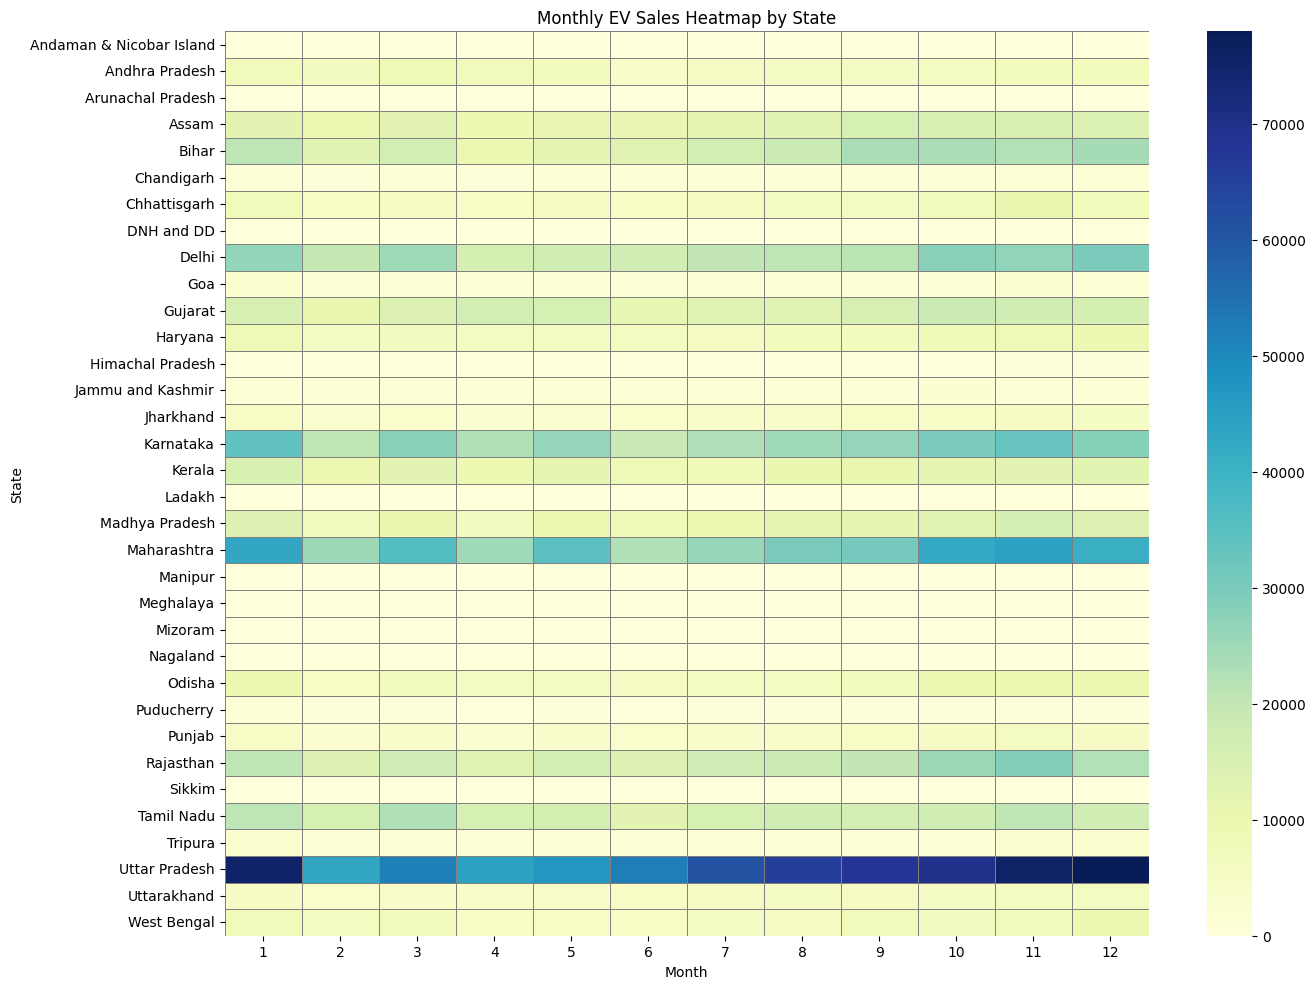

In [75]:
pivot = df2.pivot_table(index='State', columns='Month', values='EV_Sales_Quantity', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Monthly EV Sales Heatmap by State")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [74]:
df3.head()

,Sl. No.,State,No. of PCS as on 31st March 2024
0,1,Andaman and Nicobar Islands,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124


In [76]:
df3=df3.rename(columns={'No. of PCS as on 31st March 2024':'PCS'})

# Top 15 States by Number of Public Charging Stations (PCS)

C:\Users\yrahu\AppData\Local\Temp\ipykernel_15112\1417875933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='PCS', data=pcs_sorted.head(15), palette='Blues_d')


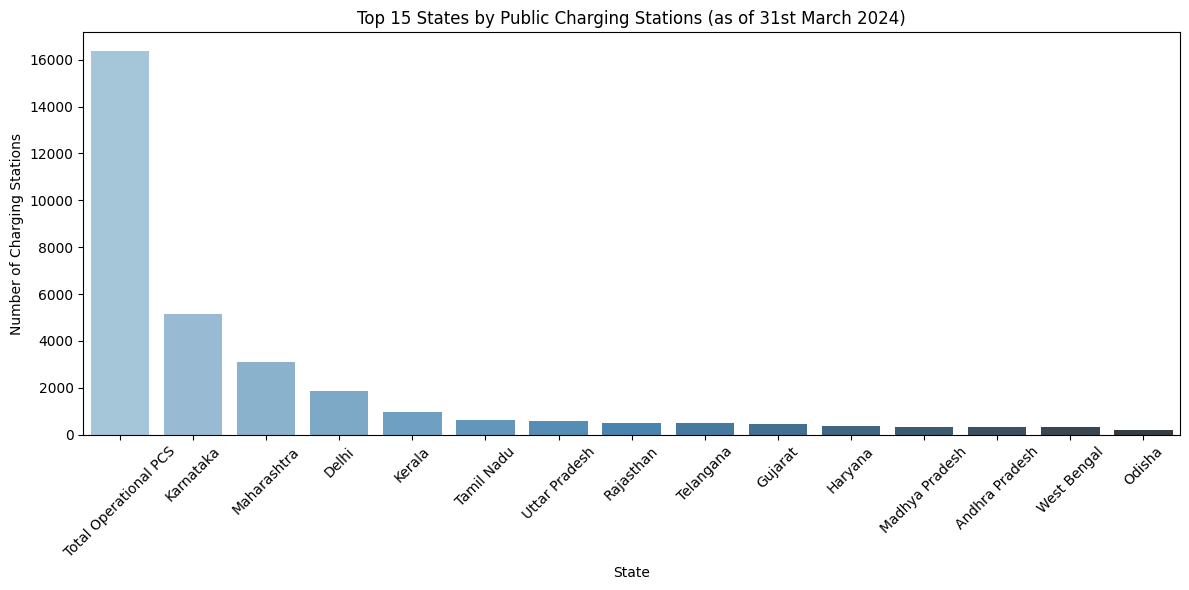

In [83]:
pcs_sorted=df3.sort_values(by='PCS', ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(x='State', y='PCS', data=pcs_sorted.head(15), palette='Blues_d')

plt.title("Top 15 States by Public Charging Stations (as of 31st March 2024)")
plt.xlabel("State")
plt.ylabel("Number of Charging Stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Key Statsics

In [84]:
print('Total PCS In india', df3['PCS'].sum())
print(' Max PCS In State', pcs_sorted.iloc[0])
print('min PCS In State', pcs_sorted.iloc[-1])
print('Describe Summary\n')
df3['PCS'].describe()

Total PCS In india 32696
 Max PCS In State Sl. No.    Total Operational PCS
State      Total Operational PCS
PCS                        16348
Name: 34, dtype: object
min PCS In State Sl. No.                                          31
State      Dadra and Nagar Haveli and Daman and Diu
PCS                                               1
Name: 30, dtype: object
Describe Summary



count       35.000000
mean       934.171429
std       2865.061158
min          1.000000
25%         19.500000
50%        135.000000
75%        479.500000
max      16348.000000
Name: PCS, dtype: float64

# Pie Chart of PCS Share by State (Top 10)

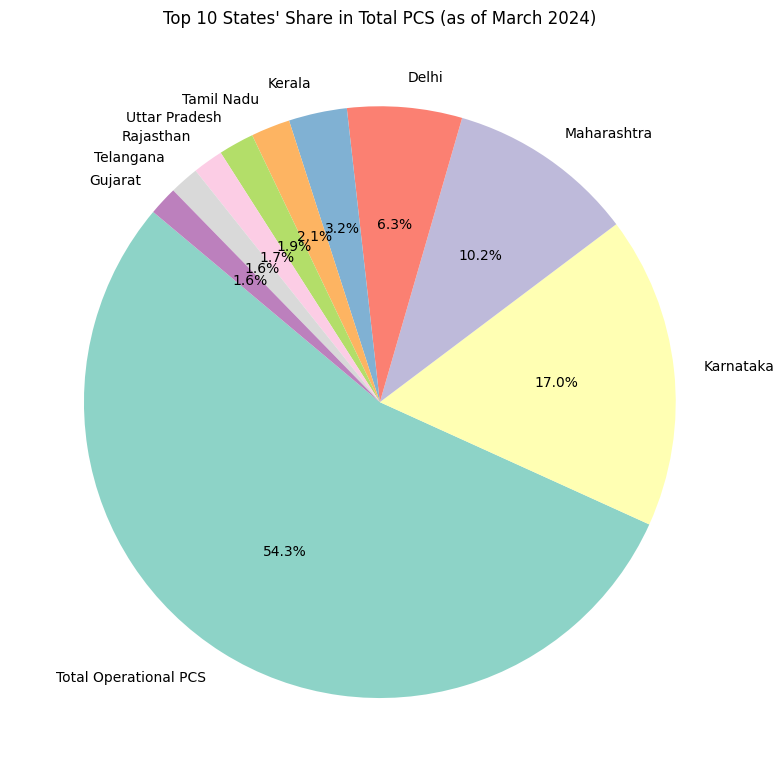

In [86]:
top_10 = pcs_sorted.head(10)
plt.figure(figsize=(8, 8))
plt.pie(
    top_10['PCS'],
    labels=top_10['State'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3', n_colors=10)
)
plt.title("Top 10 States' Share in Total PCS (as of March 2024)")
plt.tight_layout()
plt.show()

# 2 Whiler Scatter

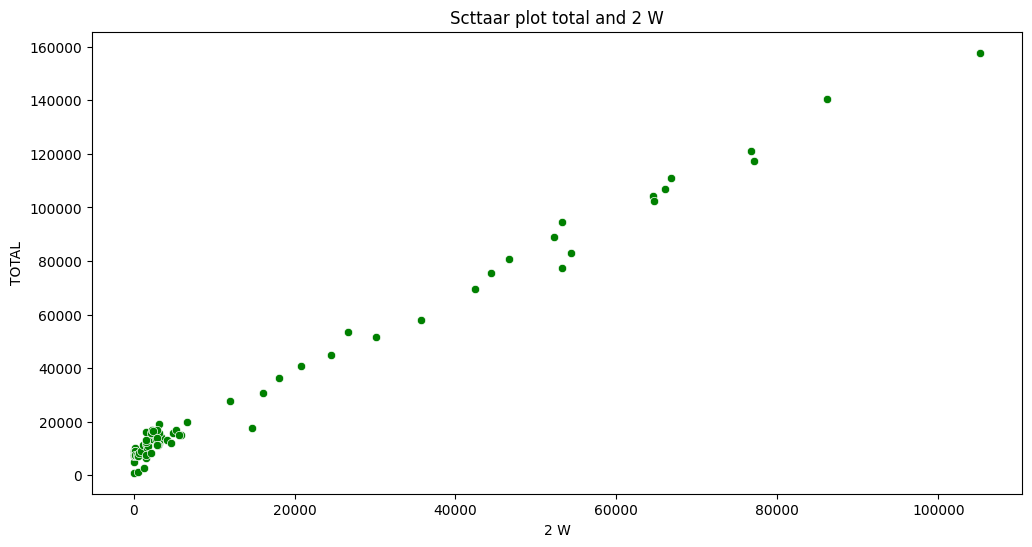

In [7]:

plt.figure(figsize=(12,6))
sns.scatterplot(x='2 W', y='TOTAL', data=df4, color='Green')
plt.title("Scttaar plot total and 2 W")
plt.show()

# 3 Whiler Scatter

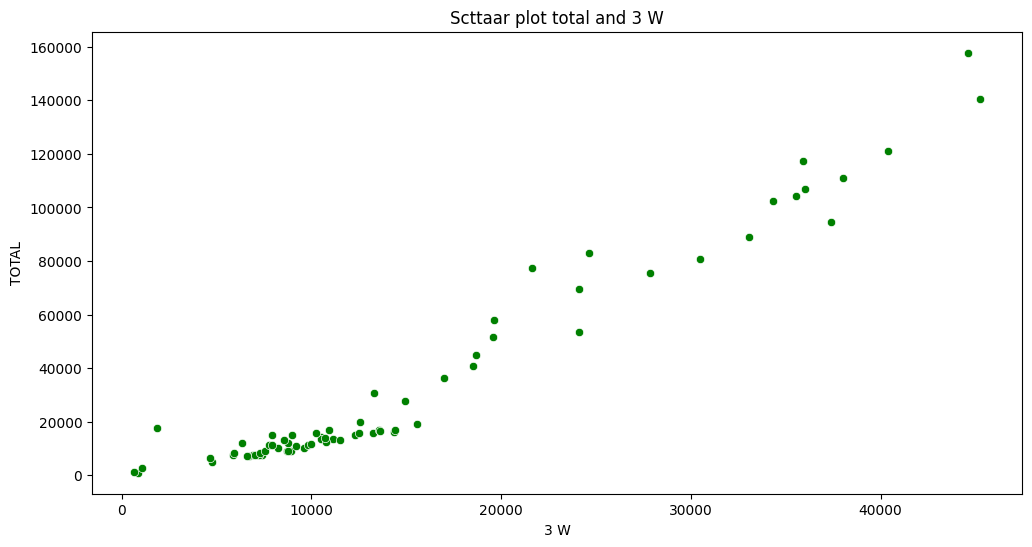

In [8]:

plt.figure(figsize=(12,6))
sns.scatterplot(x='3 W', y='TOTAL', data=df4, color='Green')
plt.title("Scttaar plot total and 3 W")
plt.show()

# 4 Whiler Scatter

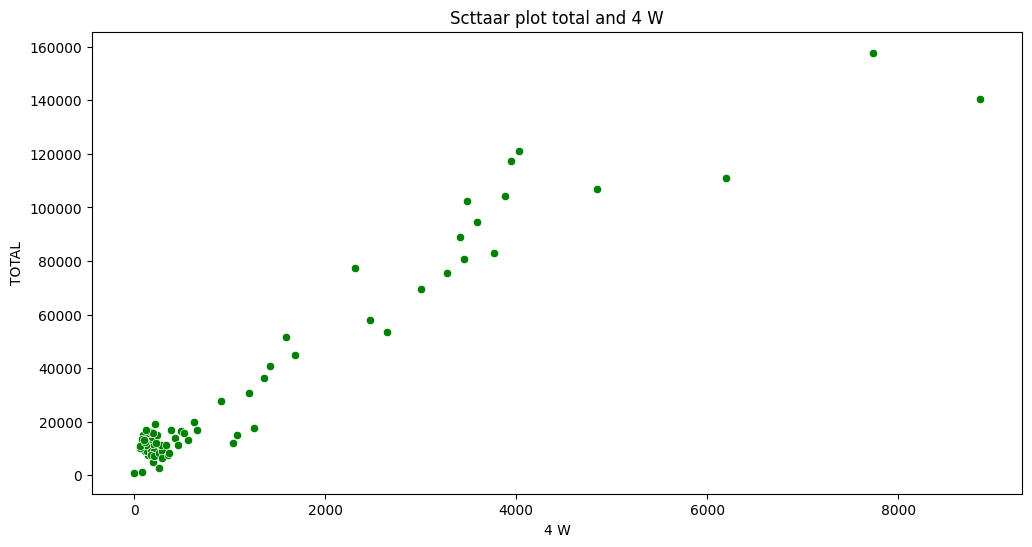

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='4 W', y='TOTAL', data=df4, color='Green')
plt.title("Scttaar plot total and 4 W")
plt.show()

# Total Registration year

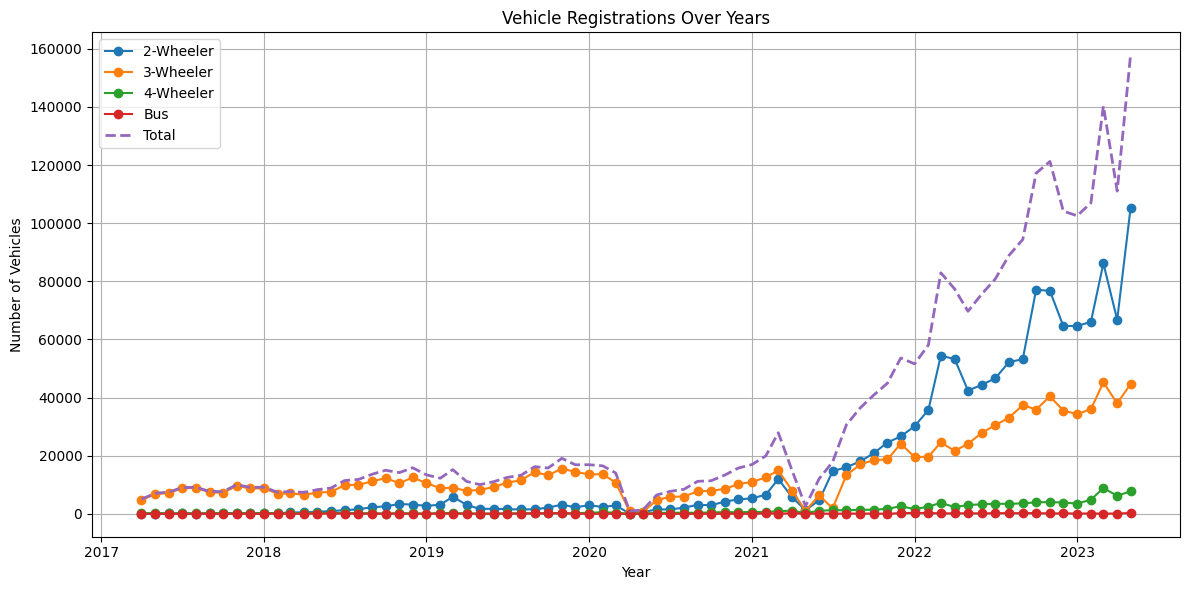

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df4['YEAR'], df4['2 W'], label='2-Wheeler', marker='o')
plt.plot(df4['YEAR'], df4['3 W'], label='3-Wheeler', marker='o')
plt.plot(df4['YEAR'], df4['4 W'], label='4-Wheeler', marker='o')
plt.plot(df4['YEAR'], df4['BUS'], label='Bus', marker='o')
plt.plot(df4['YEAR'], df4['TOTAL'], label='Total', linestyle='--', linewidth=2)

plt.title("Vehicle Registrations Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Vehicale Type Per Year

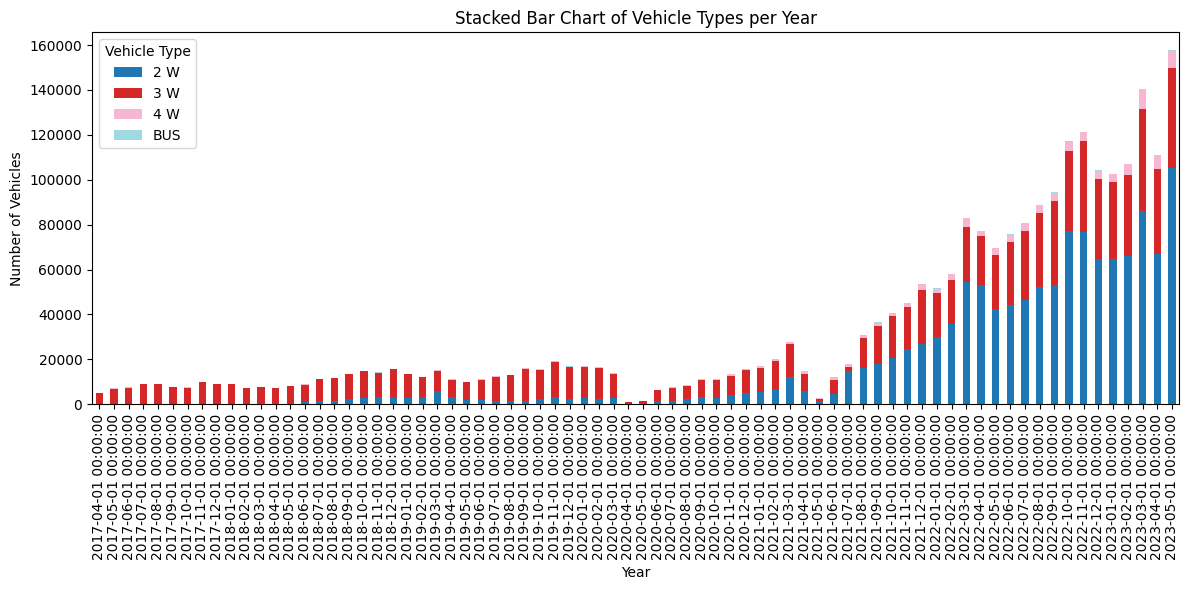

In [23]:
vehicle_cols = ['2 W', '3 W', '4 W', 'BUS']

df_plot = df4.set_index('YEAR')[vehicle_cols]

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Stacked Bar Chart of Vehicle Types per Year")
plt.ylabel("Number of Vehicles")
plt.xlabel("Year")
plt.tight_layout()
plt.legend(title="Vehicle Type")
plt.show()

# Share Year

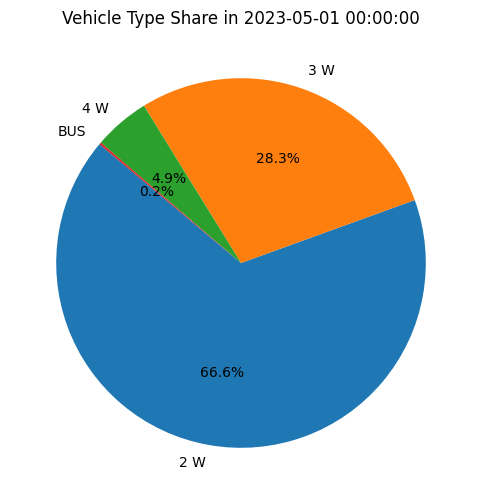

In [24]:
latest_year = df4['YEAR'].max()
latest_data = df4[df4['YEAR'] == latest_year][vehicle_cols].iloc[0]

plt.figure(figsize=(6, 6))
plt.pie(latest_data, labels=vehicle_cols, autopct='%1.1f%%', startangle=140)
plt.title(f"Vehicle Type Share in {latest_year}")
plt.show()

# Total Registration and Vehicle Class

C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\1585127889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle Class', y='Total Registration', data=df5,palette='viridis')


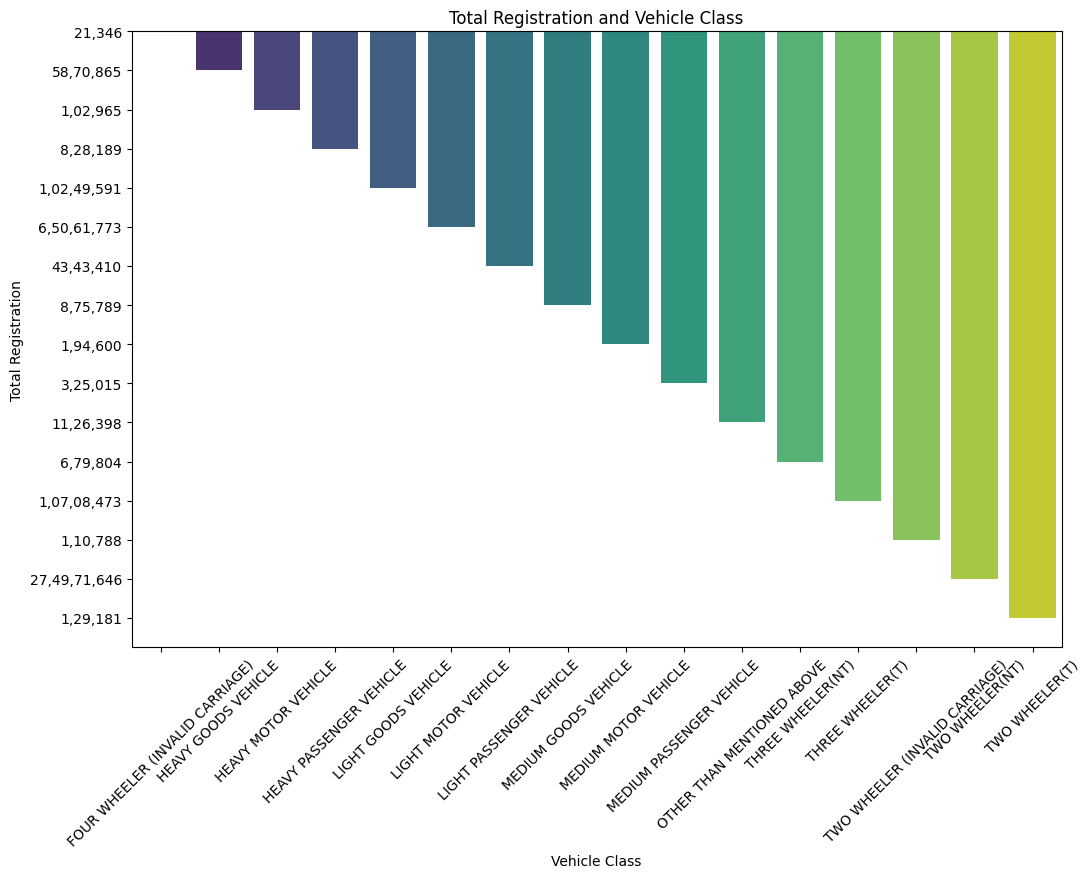

In [41]:
plt.figure(figsize=(12,8))

sns.barplot(x='Vehicle Class', y='Total Registration', data=df5,palette='viridis')
plt.title("Total Registration and Vehicle Class")
plt.xticks(rotation=45)  
plt.show()

# Top 5 Vehicale class by Total Total Registration

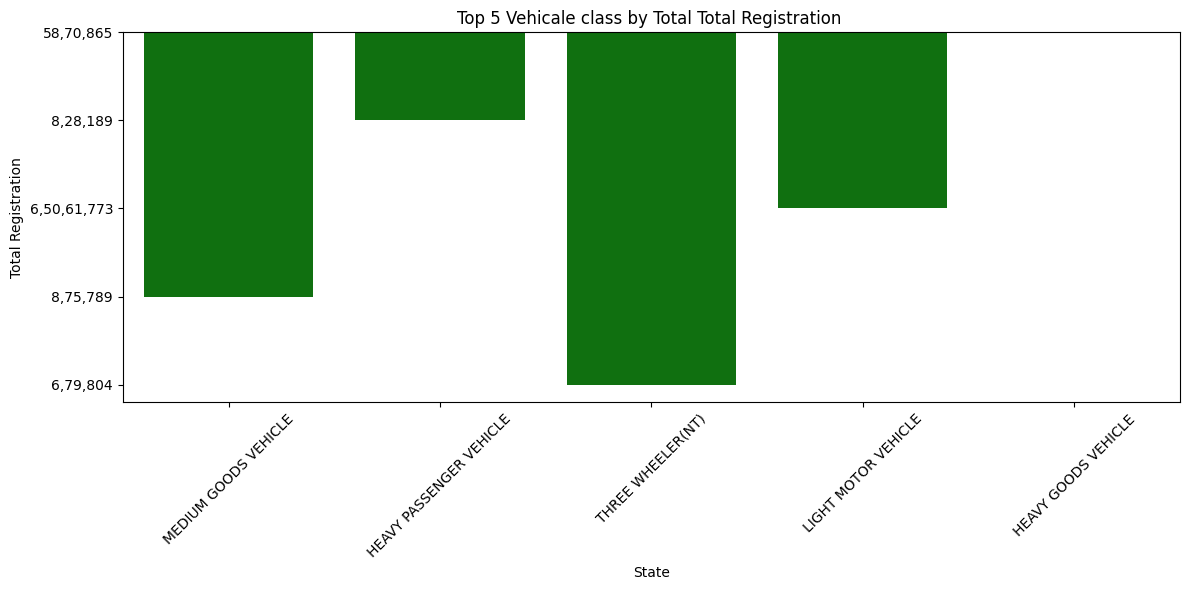

In [ ]:
top=df5.groupby('Vehicle Class')['Total Registration'].sum().sort_values(ascending=False).head(5).index
df_top_vehicle = df5[df5['Vehicle Class'].isin(top)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle Class', y='Total Registration', data=df_top_vehicle, estimator=sum, order=top, color='Green')
plt.title("Top 5 Vehicale class by Total Total Registration ")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Registration")
plt.tight_layout()
plt.show()

# Top 10 Vehicale class by Total Total Registration

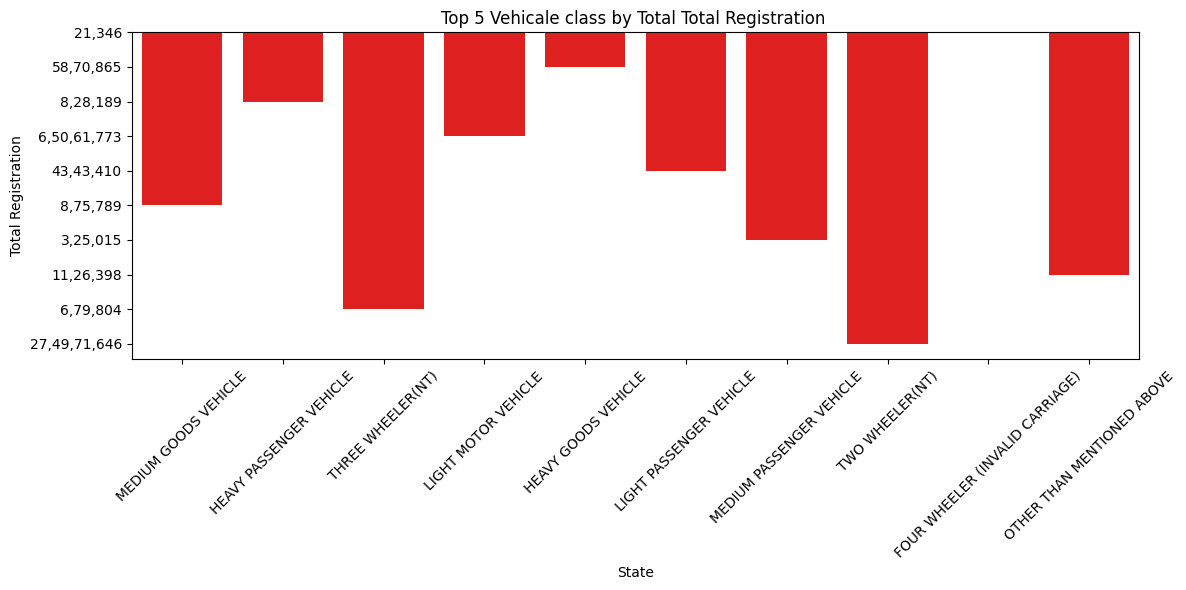

In [46]:
top=df5.groupby('Vehicle Class')['Total Registration'].sum().sort_values(ascending=False).head(10).index
df_top_vehicle = df5[df5['Vehicle Class'].isin(top)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle Class', y='Total Registration', data=df_top_vehicle, estimator=sum, order=top, color='red')
plt.title("Top 5 Vehicale class by Total Total Registration ")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Registration")
plt.tight_layout()
plt.show()

# Share of Vehicale Classs in  India

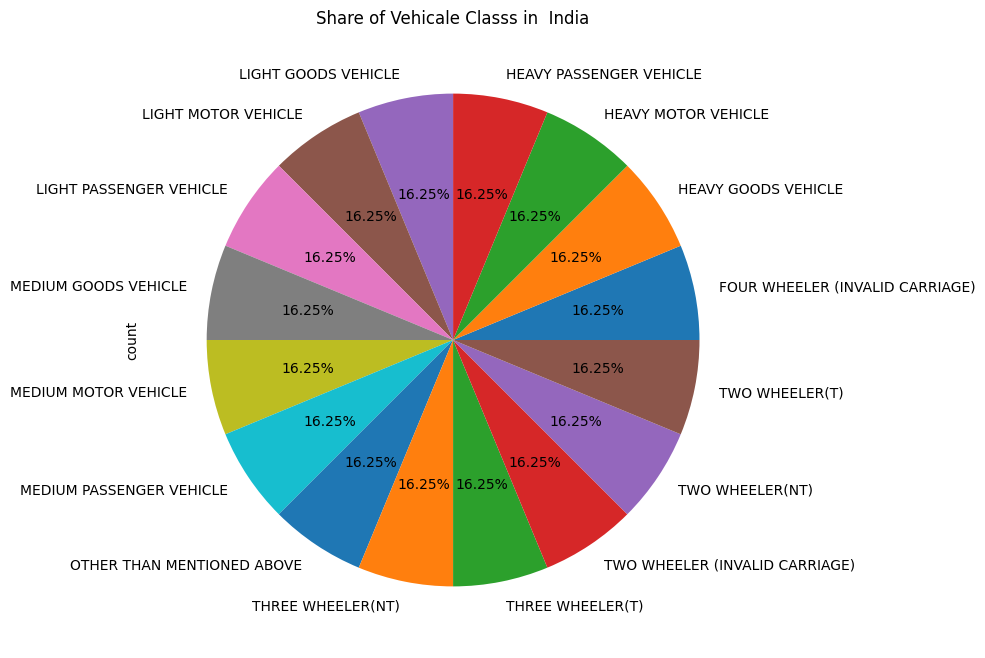

In [52]:
df5['Vehicle Class'].value_counts().plot(kind='pie', autopct='1%.2F%%', figsize=(12,8))
plt.title("Share of Vehicale Classs in  India")
plt.show()

#  Segmentation

In [149]:
df2.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [150]:
df3.head()

,Sl. No.,State,PCS
0,1,Andaman and Nicobar Islands,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124


In [151]:
df4.head()

,2 W,3 W,4 W,BUS,TOTAL
0,96,4748,198,0,5042
1,91,6720,215,2,7028
2,137,7178,149,1,7465
3,116,8775,120,0,9011
4,99,8905,137,0,9141


In [152]:
df5.head()

,Vehicle Class,Total_reg
0,FOUR WHEELER (INVALID CARRIAGE),"21,346"
1,HEAVY GOODS VEHICLE,"58,70,865"
2,HEAVY MOTOR VEHICLE,"1,02,965"
3,HEAVY PASSENGER VEHICLE,"8,28,189"
4,LIGHT GOODS VEHICLE,"1,02,49,591"


In [153]:
state_ev_sales = df2.groupby('State')['EV_Sales'].sum().reset_index()


In [154]:
df3_clean = df3.rename(columns={'State': 'State', 'PCS': 'Charging_Stations'})[['State', 'Charging_Stations']]


In [159]:
df4.head()

,2 W,3 W,4 W,BUS,TOTAL
0,96,4748,198,0,5042
1,91,6720,215,2,7028
2,137,7178,149,1,7465
3,116,8775,120,0,9011
4,99,8905,137,0,9141


In [160]:
vehicle_type_data = df4[['2 W', '3 W', '4 W', 'BUS']].sum().reset_index()
vehicle_type_data.columns = ['Vehicle_Type', 'Total_Sales']
print(vehicle_type_data)


  Vehicle_Type  Total_Sales
0          2 W      1253466
1          3 W      1099000
2          4 W        94170
3          BUS         6091


In [161]:
# Then just rename appropriately
df4_clean = df4.rename(columns={'2 W': '2W', '3 W': '3W', '4 W': '4W', 'BUS': 'BUS'})


In [162]:
vehicle_reg = df5.rename(columns={'Vehicle Class': 'State', 'Total_reg': 'Total_Registrations'})


In [163]:
# Merge df2 (EV sales) + df3 (PCS)
merged = pd.merge(state_ev_sales, df3_clean, on='State', how='left')

# Merge df5 (Total registrations)
merged = pd.merge(merged, vehicle_reg, on='State', how='left')

# Handle missing values
merged.fillna(0, inplace=True)


C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\2381377795.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged.fillna(0, inplace=True)


In [164]:
merged['EV_Penetration'] = merged['EV_Sales'] / (merged['Total_Registrations'] + 1)
merged['Charging_Density'] = merged['Charging_Stations'] / (merged['EV_Sales'] + 1)


In [165]:
features = merged[['EV_Sales', 'Charging_Stations', 'Total_Registrations', 'EV_Penetration', 'Charging_Density']]


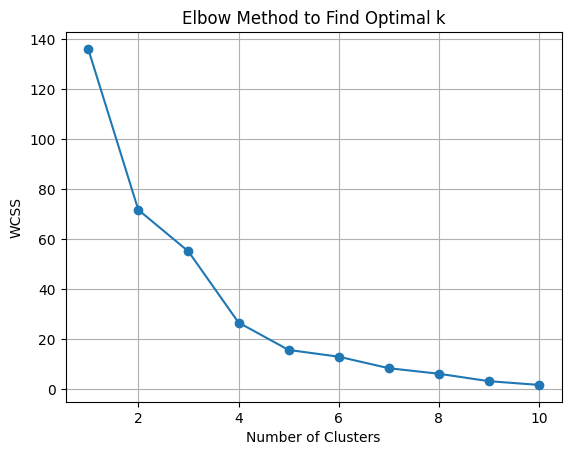

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()


C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\3822021148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Type', y='Total_Sales', data=vehicle_type_data, palette='viridis')


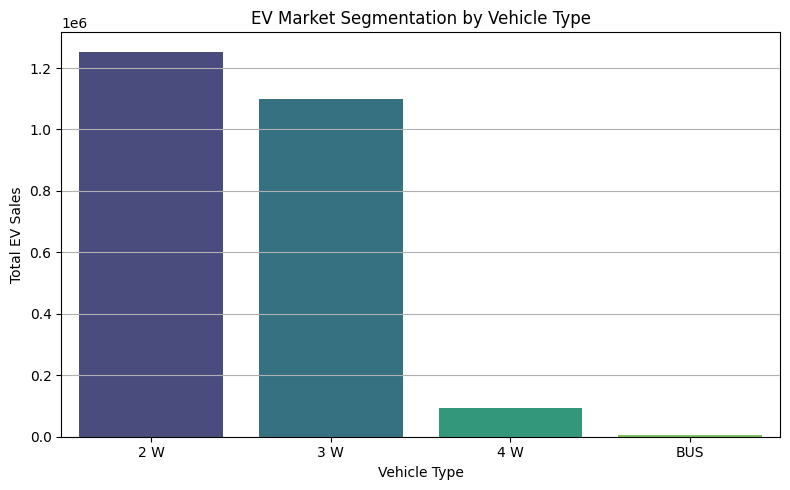

In [168]:

# Barplot — Market Segmentation by Vehicle Type
plt.figure(figsize=(8, 5))
sns.barplot(x='Vehicle_Type', y='Total_Sales', data=vehicle_type_data, palette='viridis')
plt.title('EV Market Segmentation by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total EV Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


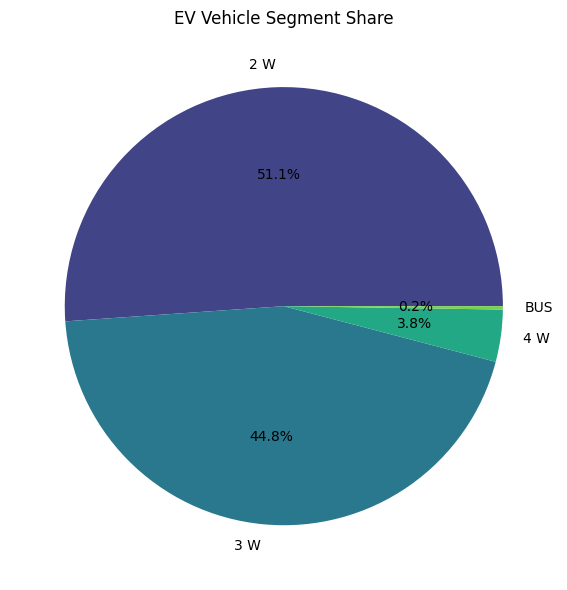

In [169]:
# Pie Chart — Vehicle Segment Share
plt.figure(figsize=(6, 6))
plt.pie(vehicle_type_data['Total_Sales'], 
        labels=vehicle_type_data['Vehicle_Type'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette('viridis', len(vehicle_type_data)))
plt.title('EV Vehicle Segment Share')
plt.tight_layout()
plt.show()


C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\2442454257.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EV_Sales', y='State', data=geo_df.sort_values('EV_Sales', ascending=False), palette='viridis')


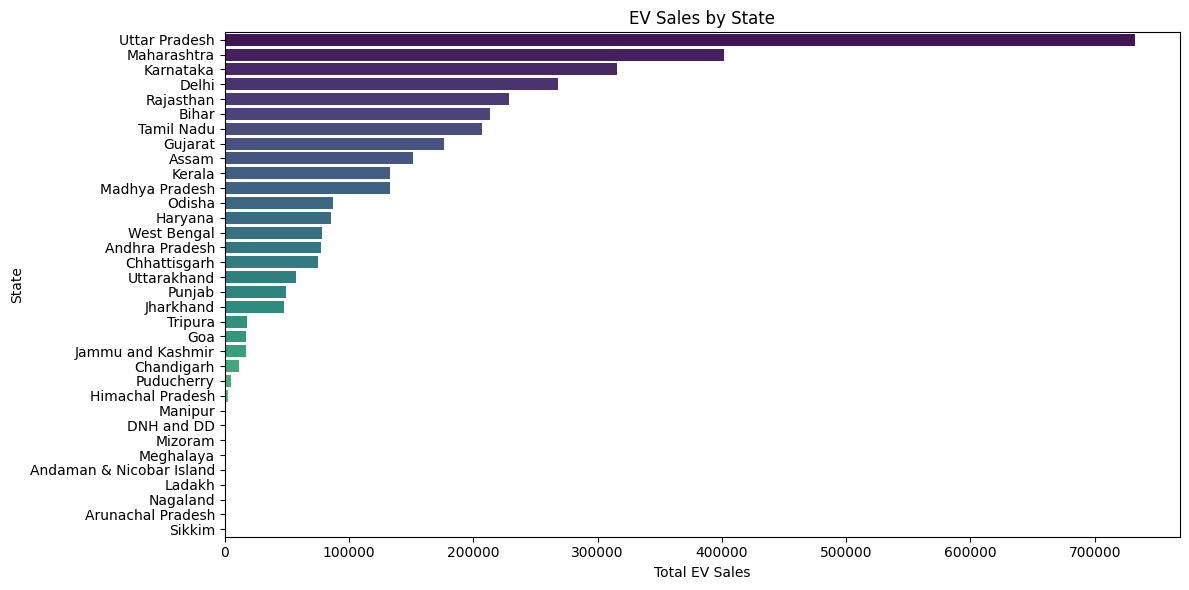

In [170]:
# Step 1: Aggregate EV sales per state
state_sales = df2.groupby('State')['EV_Sales'].sum().reset_index()

# Step 2: Merge with PCS (charging stations) data
df3_clean = df3.rename(columns={'PCS': 'Charging_Stations'})
geo_df = pd.merge(state_sales, df3_clean, on='State', how='left')
geo_df.fillna(0, inplace=True)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='EV_Sales', y='State', data=geo_df.sort_values('EV_Sales', ascending=False), palette='viridis')
plt.title('EV Sales by State')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()


C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\2157623609.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_df.fillna(0, inplace=True)
C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\2157623609.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EV_Penetration', y='State', data=full_df.sort_values('EV_Penetration', ascending=False), palette='mako')


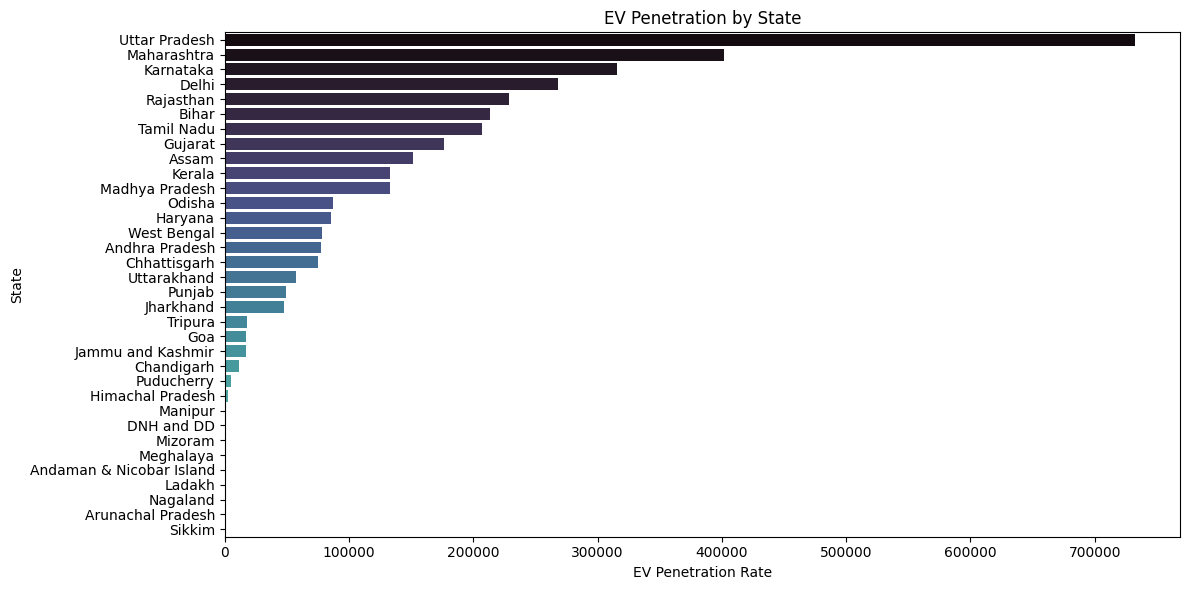

In [171]:
# If you have total vehicle registrations per state (df5)
df5_clean = df5.rename(columns={'Vehicle Class': 'State', 'Total_reg': 'Total_Registrations'})
full_df = pd.merge(geo_df, df5_clean, on='State', how='left')
full_df.fillna(0, inplace=True)

# Create ratio columns
full_df['EV_Penetration'] = full_df['EV_Sales'] / (full_df['Total_Registrations'] + 1)
full_df['Charging_Density'] = full_df['Charging_Stations'] / (full_df['EV_Sales'] + 1)

# Plot EV Penetration
plt.figure(figsize=(12, 6))
sns.barplot(x='EV_Penetration', y='State', data=full_df.sort_values('EV_Penetration', ascending=False), palette='mako')
plt.title('EV Penetration by State')
plt.xlabel('EV Penetration Rate')
plt.ylabel('State')
plt.tight_layout()
plt.show()


# Model

In [177]:
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [189]:
df=pd.merge(df3,df2,on='State', how='outer')

<Axes: xlabel='PCS', ylabel='Count'>

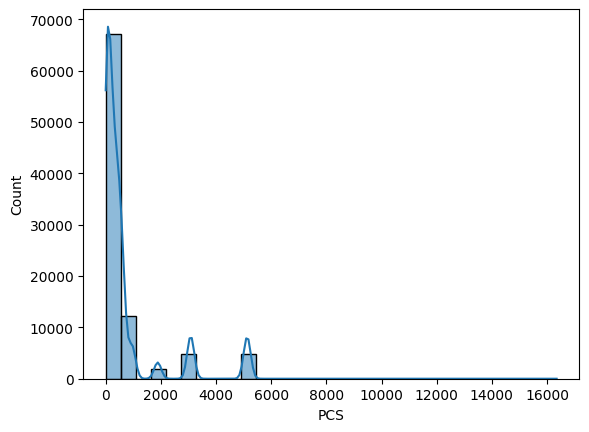

In [211]:
sns.histplot(x='PCS', kde=True, bins=30, data=merged_df)

In [ ]:

df5_renamed = df5.rename(columns={'Vehicle Class': 'Vehicle_Class'})
merged_df = pd.merge(df, df5_renamed, on='Vehicle_Class', how='left')
merged_df['Total_reg'] = merged_df['Total_reg'].fillna(merged_df['Total_reg'].mean())
merged_df.drop(columns=['Sl. No.','Total_reg','State','Month_Name'], axis=1, inplace=True)
imputer = SimpleImputer(strategy='median')
merged_df['PCS']=imputer.fit_transform(merged_df[['PCS']])
merged_df['Date']=pd.to_datetime(merged_df['Date'])

merged_df['Day']=merged_df['Date'].dt.day
merged_df['month']=merged_df['Date'].dt.month
merged_df['year']=merged_df['Date'].dt.year


merged_df.drop(columns=['Date'], axis=1, inplace=True)

for col in merged_df.select_dtypes(include='object').columns:
    dummies = pd.get_dummies(merged_df[col], prefix=col, drop_first=True).astype(int)
    merged_df = pd.concat([merged_df, dummies], axis=1)
    merged_df.drop(columns=col, inplace=True)

C:\Users\yrahu\AppData\Local\Temp\ipykernel_31836\1326372400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Date']=pd.to_datetime(merged_df['Date'])


In [236]:
x=merged_df.drop(columns='EV_Sales')
y=merged_df['EV_Sales']

x_train, x_test, y_train , y_test=train_test_split(x,y, random_state=42, test_size=0.2)
sc=StandardScaler()

x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)
rf=RandomForestRegressor()

rf.fit(x_train_sc,y_train)
y_pred=rf.predict(x_test_sc)
print('R2 Score:', r2_score(y_pred, y_test))
print("MSA", mean_squared_error(y_pred,y_test))
print("MAE", mean_absolute_error(y_pred,y_test))

R2 Score: 0.944059513633959
MSA 10831.52174044107
MAE 9.856907325417627
